In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score

data = {
    'Size': ['Medium', 'Medium', 'Large', 'Small', 'Medium'],
    'Weight': ['Medium', 'Light', 'Heavy', 'Light', 'Medium'],
    'Color': ['Red', 'Yellow', 'Green', 'Green', 'Orange'],
    'Fruit': ['Apple', 'Banana', 'Watermelon', 'Grape', 'Orange']
}

df = pd.DataFrame(data)


df_encoded = pd.get_dummies(df, columns=['Size', 'Weight', 'Color'])
X = df_encoded.drop('Fruit', axis=1)
y = df['Fruit']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


print(export_text(model, feature_names=list(X.columns)))


Accuracy: 0.0
|--- Size_Large <= 0.50
|   |--- Color_Red <= 0.50
|   |   |--- class: Grape
|   |--- Color_Red >  0.50
|   |   |--- class: Apple
|--- Size_Large >  0.50
|   |--- class: Watermelon



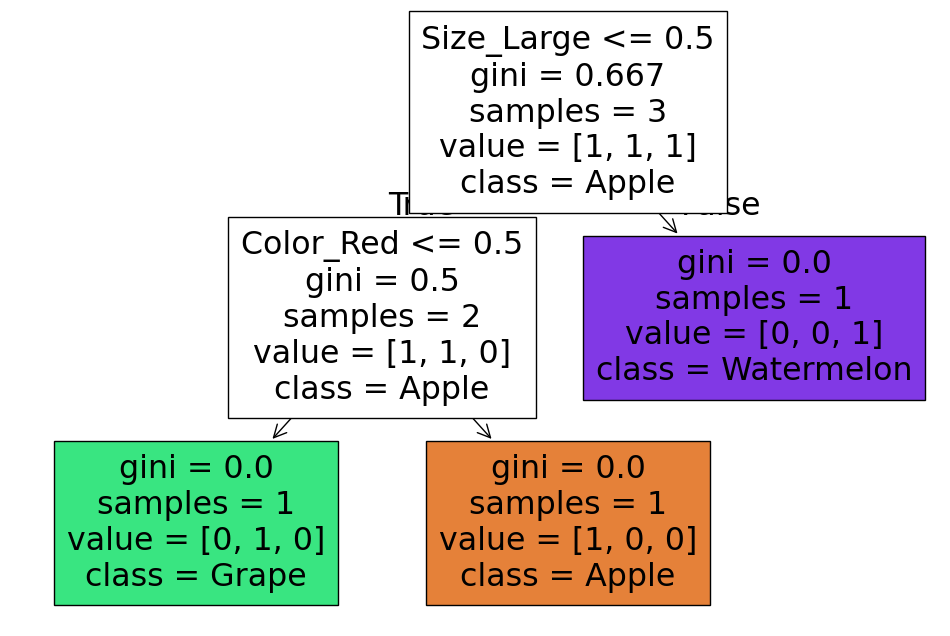

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()


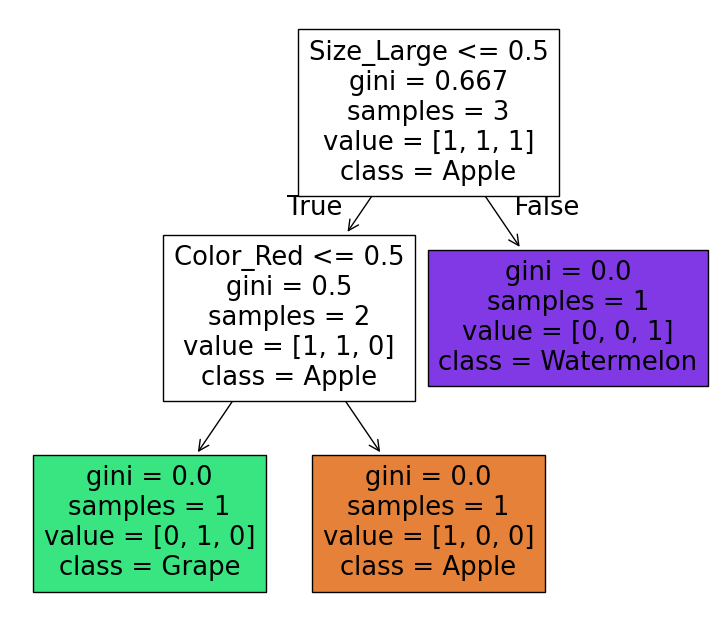

In [4]:
plt.figure(figsize=(9, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()


In [11]:
import pandas as pd

# Define a new sample (e.g., an Apple-like fruit)
new_sample = pd.DataFrame([{
    'Size_Small': 0,   # 0 because the size is not 'Small'
    'Size_Medium': 1,  # 1 because the size is 'Medium'
    'Size_Large': 0,   # 0 because the size is not 'Large'
    'Weight_Light': 0, # 0 because the weight is not 'Light'
    'Weight_Medium': 1,# 1 because the weight is 'Medium'
    'Weight_Heavy': 0, # 0 because the weight is not 'Heavy'
    'Color_Red': 1,    # 1 because the color is 'Red'
    'Color_Yellow': 0, # 0 because the color is not 'Yellow'
    'Color_Green': 0,  # 0 because the color is not 'Green'
    'Color_Orange': 0  # 0 because the color is not 'Orange'
}])


In [12]:
# Ensure the new sample has the same columns as the training data
new_sample = new_sample.reindex(columns=X.columns, fill_value=0)


In [13]:
# Predict the fruit
predicted_fruit = model.predict(new_sample)

# Display the result
print("Predicted Fruit:", predicted_fruit[0])


Predicted Fruit: Apple
